In [5]:
# standard libraries
import math, os, time, sys
import numpy as np
from datetime import datetime

# plotting
import matplotlib.pyplot as plt

# progress bars
from tqdm.notebook import trange, tqdm

# PyTorch
import torch

from IPython.display import clear_output # for animating the plot

#modules_path = os.path.abspath('../Main')
#sys.path.append(modules_path)

#from Train_v2 import *
#from Visualisation import *

from Main import Train_v2
from Main import Visualisation

In [6]:
from Main import Legendre
from Main import Canonical

In [7]:
Imagepath = os.path.abspath('./Figures/Intro')

In [8]:
# Handy line for using a CUDA device if available but default to the CPU if not
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

## Chapter 1

### Figures 1.1a, 1.1b and 1.1c

We want to plot the analytical solution for $\varepsilon=1$, $\varepsilon=0.1$ and $\varepsilon=0.01$.

In [ ]:
def plot_ex_sol(epsil: float, ymax: float, save_title: str):
    """Plots the exact solution for some given epsilon with y-range [0,ymax]. 
    Saved as ./Figures/save_title.pdf"""
    x=np.linspace(0,1,1001)

    y = x+ 1/(np.exp(1/epsil)-1)-1/(np.exp(1/epsil)-1)*np.exp(x/epsil) #analytical solution

    plt.figure(figsize=[3,2])
    plt.grid()
    plt.xlim([0,1])
    plt.ylim([0,ymax])
    plt.xlabel(r'$x$')
    plt.ylabel(r'$u(x)$')
    plt.tight_layout()
    plt.plot(x,y)
    
    savepath = os.path.join(Imagepath, save_title)
    plt.savefig(savepath)

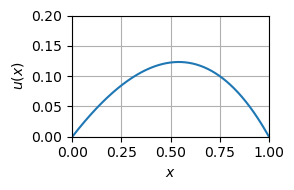

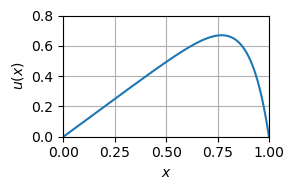

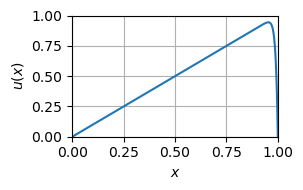

In [9]:
plot_ex_sol(1, 0.2, 'real_sol_eps1.pdf')
plot_ex_sol(0.1, 0.8, 'real_sol_eps0_1.pdf')
plot_ex_sol(0.01, 1, 'real_sol_eps0_01.pdf')

### Figures 1.2a, 1.2b and 1.2c

In [ ]:
def plot_tanh_sol(epsil: float, ymax: float, x0: float, save_title: str):
    """Plots a tanh approximation for some given epsilon with y-range [0,ymax]. 
    x0 is a parameter for the accuracy of the approximation. A larger x0 gives
    a better approximation. Saved as ./Figures/save_title.pdf"""
    x=np.linspace(0,1,1001)

    y0 = np.exp(x0)*1/2*(1-np.tanh((1-x)/(2*epsil)+x0/2)) #approx of exponential
    y = 2*x0*np.tanh(x/2/x0) + 1/(np.exp(1/epsil)-1) - 1/(1-np.exp(-1/epsil))* y0

    plt.figure(figsize=[3,2])
    plt.grid()
    plt.xlim([0,1])
    plt.ylim([0,ymax])
    plt.xlabel(r'$x$')
    plt.ylabel(r'$u(x)$')
    plt.tight_layout()
    plt.plot(x,y)
    
    savepath = os.path.join(Imagepath, save_title)
    plt.savefig(savepath)

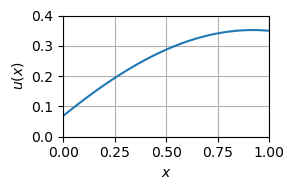

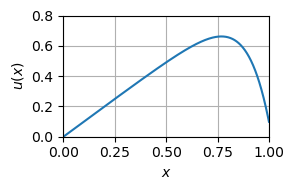

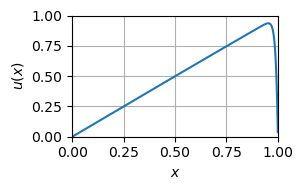

In [19]:
plot_tanh_sol(1, 0.4, 1, 'tanh_eps1.pdf')
plot_tanh_sol(0.1, 0.8, 2, 'tanh_eps01.pdf')
plot_tanh_sol(0.01, 1, 3, 'tanh_eps001.pdf')

### Figures 1.2d, 1.2e, 1.2f

In [25]:
def plot_poly_sol(epsil: float, n: int, ymin:float, ymax: float, save_title: str):
    """Plots the exact solution for some given epsilon andn n with y-range [0,ymax]. 
    Saved as ./Figures/save_title.pdf"""

    y=Legendre.Legendre_solution(n,epsil).y_coords()
    x=np.linspace(0,1,1000)

    plt.figure(figsize=[3,2])
    plt.grid()
    plt.xlim([0,1])
    plt.ylim([ymin,ymax])
    plt.xlabel(r'$x$')
    plt.ylabel(r'$u(x)$')
    plt.tight_layout()
    plt.plot(x,y)

    savepath = os.path.join(Imagepath, save_title)
    plt.savefig(savepath,transparent=True)

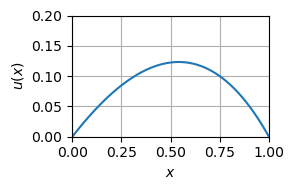

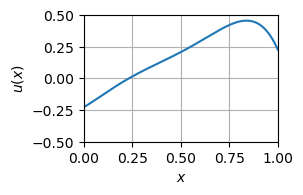

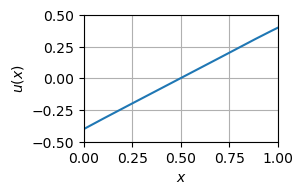

In [27]:
plot_poly_sol(1, 5, 0, 0.2, 'poly_eps1.pdf')
plot_poly_sol(0.1, 5, -0.5, 0.5, 'poly_eps01.pdf')
plot_poly_sol(0.01, 5, -0.5, 0.5, 'poly_eps001.pdf')

### Figures 1.3a and 1.3b

Train the neural network as below:

In [28]:
torch.manual_seed(0)
Result = Train_v2.train_network(LR=0.1, 
                                HIDDEN=3, 
                                NR_EPOCHS=2500, 
                                h_SAMPLE=0.01, 
                                LAMBDA=1/2,
                                PLOT_INTERVAL=-1,
                                EPSIL=0.05, 
                                Initializer=Train_v2.initializeNetwork, 
                                optim='SGD',
                                momentum=0.95)

Save the eventual approximation and the corresponding loss for the random initialization

In [29]:
Fig1_3a_random = Result.sol()
Fig1_3a_random_loss = Result.loss_list

Now initialize using an approximation of the exact solution

In [30]:
epsil = 0.05
x0 = 2
a0, b0, w0 = np.exp(x0), 0 , np.exp(-x0)
a1, b1, w1 = -np.exp(x0), np.arctanh(1/2), 0
a2, b2, w2 = 1/2*np.exp(x0), 1/2*x0+1/(2*epsil), -1/(2*epsil)

w = torch.tensor([[w0],[w1],[w2]]).to(device)
w = w.float()
a = torch.tensor([[a0,a1,a2]]).to(device)
a = a.float()
b = torch.tensor([b0,b1,b2]).to(device)
b = b.float()

In [31]:
torch.manual_seed(0)
Result = Train_v2.train_network(LR=0.02, 
                                HIDDEN=3, 
                                NR_EPOCHS=2500, 
                                h_SAMPLE=0.001, 
                                LAMBDA=1/2,
                                PLOT_INTERVAL=-1,
                                EPSIL=0.05, 
                                Initializer=Train_v2.initializeNetwork_guess, 
                                optim='SGD',
                                momentum=0.95,
                                params=[w,a,b])

Save the results of the training:

In [32]:
Fig1_3a_init = Result.sol()
Fig1_3a_init_loss = Result.loss_list

And make the figures:

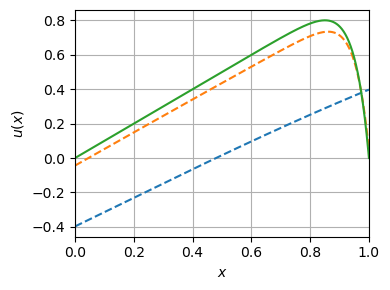

In [34]:
epsil = 0.05

x = np.arange(0,1.0001,0.001)
yex = x + 1/(np.exp(1/epsil))*(1-np.exp(x/epsil))

plt.figure(figsize=[4,3])
plt.grid()
plt.xlim([0,1])
plt.xlabel('$x$')
plt.ylabel('$u(x)$')

plt.plot(x, Fig1_3a_random, '--', label='Random initialization')
plt.plot(x, Fig1_3a_init, '--', label='$\\theta_0 = \hat{\\theta}$')
plt.plot(x, yex, label='$u_{ex}$')
plt.tight_layout()

savepath = os.path.join(Imagepath, 'solncompare.pdf')
plt.savefig(savepath)

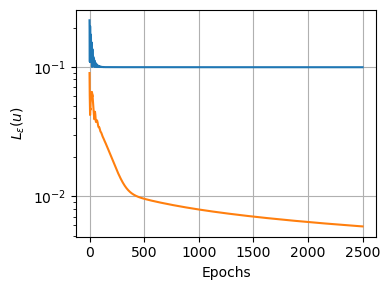

In [36]:
plt.figure(figsize=[4,3])
plt.grid()

plt.semilogy(Fig1_3a_random_loss)
plt.semilogy(Fig1_3a_init_loss)

plt.xlabel('Epochs')
plt.ylabel('$L_\epsilon(u)$')
plt.tight_layout()

savepath = os.path.join(Imagepath, 'losscompare.pdf')
plt.savefig(savepath)

## Chapter 3

In [37]:
Imagepath = os.path.abspath('./Figures/Gamma_exp')

### Figures 3.1a, 3.1b and 3.1c

In these figures we plot the solutions to the non-homogeneous system 
$$
\begin{cases}
-\varepsilon u''(x)+Fu'(x)&=f \quad x\in(0,1)\\
 u(0)-g_0&=0\\
 u(1)-g_1&=0
\end{cases}
$$
for different parameters and different $\varepsilon$, including the case where $\varepsilon=0$ and we neglect the right boundary condition.

* $F=1$, $g_0=g_1=0$ and $f(x)=x$:

In [38]:
def u1(x,epsil):
    return (1 - np.exp(1)**(x/epsil) - x**2 + np.exp(1)**epsil**(-1)*x**2 + \
            2*epsil - 2*np.exp(1)**(x/epsil)*epsil - 2*x*epsil + \
            2*np.exp(1)**epsil**(-1)*x*epsil)/(2*(-1 + np.exp(1)**epsil**(-1)))

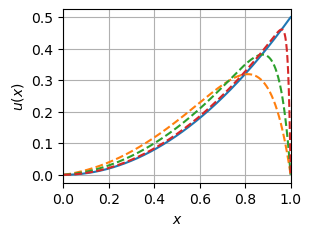

In [ ]:
x= np.linspace(0,1,1000)

plt.figure(figsize=[3,2.25], layout="constrained")
plt.grid()
plt.xlim([0,1])

plt.plot(x, x**2/2) #solution eps = 0
plt.plot(x, u1(x, 0.1 ), '--')
plt.plot(x, u1(x, 0.05), '--')
plt.plot(x, u1(x, 0.01), '--')
plt.xlabel('$x$')
plt.ylabel('$u(x)$')

savepath = os.path.join(Imagepath, 'f1.pdf')
plt.savefig(savepath,transparent=True)

* $F=1$, $g_0=g_1=0$ and $f(x)=\sin(5\pi x)+x$:

In [ ]:
def u2(x,epsil):
    return (2 + 2*np.exp(1)**epsil**(-1) - 4*np.exp(1)**(x/epsil) + 5*np.pi - \
            5*np.exp(1)**(x/epsil)*np.pi - 5*np.pi*x**2 + \
            5*np.exp(1)**epsil**(-1)*np.pi*x**2 + 10*np.pi*epsil - \
            10*np.exp(1)**(x/epsil)*np.pi*epsil - 10*np.pi*x*epsil + \
            10*np.exp(1)**epsil**(-1)*np.pi*x*epsil + 125*np.pi**3*epsil**2 - \
            125*np.exp(1)**(x/epsil)*np.pi**3*epsil**2 - \
            125*np.pi**3*x**2*epsil**2 + \
            125*np.exp(1)**epsil**(-1)*np.pi**3*x**2*epsil**2 + \
            250*np.pi**3*epsil**3 - 250*np.exp(1)**(x/epsil)*np.pi**3*epsil**3 - \
            250*np.pi**3*x*epsil**3 + \
            250*np.exp(1)**epsil**(-1)*np.pi**3*x*epsil**3 + 2*np.cos(5*np.pi*x) \
            - 2*np.exp(1)**epsil**(-1)*np.cos(5*np.pi*x) - \
            10*np.pi*epsil*np.sin(5*np.pi*x) + \
            10*np.exp(1)**epsil**(-1)*np.pi*epsil*np.sin(5*np.pi*x))/(10*(-1 + \
            np.exp(1)**epsil**(-1))*np.pi*(1 + 25*np.pi**2*epsil**2))

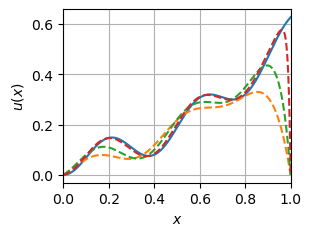

In [ ]:
x= np.linspace(0,1,1000)

plt.figure(figsize=[3,2.25], layout="constrained")
plt.grid()
plt.xlim([0,1])

plt.plot(x, 1/(10*np.pi)*((2+5*np.pi*x**2-2*np.cos(5*np.pi*x)))) #solution eps = 0
plt.plot(x, u2(x,0.1 ), '--')
plt.plot(x, u2(x,0.05), '--')
plt.plot(x, u2(x,0.01), '--')

plt.xlabel('$x$')
plt.ylabel('$u(x)$')

savepath = os.path.join(Imagepath, 'f2.pdf')
plt.savefig(savepath, transparent=True)

* $F=1$, $g_0=-\frac{1}{4}$, $g_1=1$ and $f(x)=x$:

In [40]:
def u3(x,epsil):
    return (-2 - np.exp(1)**epsil**(-1) + 3*np.exp(1)**(x/epsil) - 2*x**2 + \
            2*np.exp(1)**epsil**(-1)*x**2 + 4*epsil - \
            4*np.exp(1)**(x/epsil)*epsil - 4*x*epsil + \
            4*np.exp(1)**epsil**(-1)*x*epsil)/(4*(-1 + np.exp(1)**epsil**(-1)))

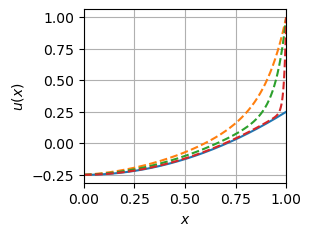

In [ ]:
x= np.linspace(0,1,1000)

plt.figure(figsize=[3,2.25], layout="constrained")
plt.grid()
plt.xlim([0,1])

plt.plot(x,-1/4+1/2*x**2) #solution eps = 0
plt.plot(x, u3(x,0.1 ), '--')
plt.plot(x, u3(x,0.05), '--')
plt.plot(x, u3(x,0.01), '--')
plt.xlabel('$x$')
plt.ylabel('$u(x)$')

savepath = os.path.join(Imagepath, 'f3bc.pdf')
plt.savefig(savepath, transparent=True)

## Chapter 4

In [9]:
Imagepath = os.path.abspath('./Figures/Gamma_poly')

Figures 4.1a and 4.1b

In [12]:
epsil_list = np.logspace(-4,0,100)
condA_list5 = []
condAn_list5=[]
condA_list10 = []
condAn_list10=[]
condA_list15 = []
condAn_list15=[]
condA_list20 = []
condAn_list20=[]
for epsil in epsil_list:
    An,b1=Canonical.A_n(5,epsil,1/2)
    condAn_list5.append(np.linalg.cond(An))
    condA_list5.append(Legendre.Legendre_solution(5,epsil).cond())
        
    An,b1=Canonical.A_n(10,epsil,1/2)
    condAn_list10.append(np.linalg.cond(An))
    condA_list10.append(Legendre.Legendre_solution(10,epsil).cond())

    An,b1=Canonical.A_n(15,epsil,1/2)
    condAn_list15.append(np.linalg.cond(An))
    condA_list15.append(Legendre.Legendre_solution(15,epsil).cond())

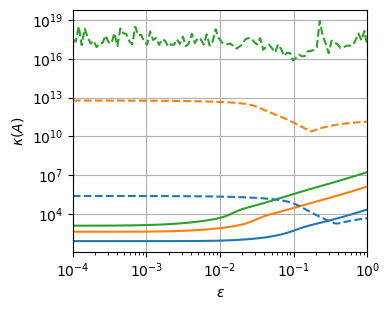

In [16]:
plt.figure(figsize=[4,3.2])
plt.loglog(epsil_list,condA_list5,label='$L_5$')
plt.loglog(epsil_list,condA_list10,label='$L_{10}$')
plt.loglog(epsil_list,condA_list15,label='$L_{15}$')

plt.gca().set_prop_cycle(None)

plt.loglog(epsil_list,condAn_list5,'--',label='$C_5$')
plt.loglog(epsil_list,condAn_list10,'--',label='$C_{10}$')
plt.loglog(epsil_list,condAn_list15,'--',label='$C_{15}$')
#plt.legend()
plt.grid()
plt.xlabel('$\epsilon$')
plt.xlim([1e-4,1])
plt.ylabel('$\kappa(A)$')
savepath = os.path.join(Imagepath, 'CondNr.pdf')
plt.tight_layout()
plt.savefig(savepath)

4.1b

In [17]:
epsil_list = np.logspace(-4,0,100)
coefA_list5 = []
coefAn_list5=[]
coefA_list10 = []
coefAn_list10=[]
coefA_list15 = []
coefAn_list15=[]
coefA_list20 = []
coefAn_list20=[]
for epsil in epsil_list:
    An,b1=Canonical.A_n(5,epsil,1/2)
    maxcoef = np.max(np.linalg.solve(An,b1))
    coefAn_list5.append(maxcoef)
    coefA_list5.append(np.max(Legendre.Legendre_solution(5,epsil).coeffs))
        
    An,b1=Canonical.A_n(10,epsil,1/2)
    maxcoef = np.max(np.linalg.solve(An,b1))
    coefAn_list10.append(maxcoef)
    coefA_list10.append(np.max(Legendre.Legendre_solution(10,epsil).coeffs))

    An,b1=Canonical.A_n(15,epsil,1/2)
    maxcoef = np.max(np.linalg.solve(An,b1))
    coefAn_list15.append(maxcoef)
    coefA_list15.append(np.max(Legendre.Legendre_solution(10,epsil).coeffs))


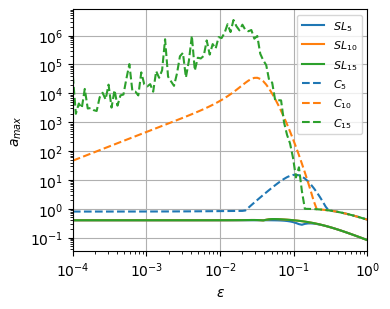

In [19]:
plt.figure(figsize=[4,3.2])
plt.loglog(epsil_list,coefA_list5,label='$SL_5$')
plt.loglog(epsil_list,coefA_list10,label='$SL_{10}$')
plt.loglog(epsil_list,coefA_list15,label='$SL_{15}$')
#plt.loglog(epsil_list,coefA_list20,label='$n=20$')

plt.gca().set_prop_cycle(None)

plt.loglog(epsil_list,coefAn_list5,'--',label='$C_5$')
plt.loglog(epsil_list,coefAn_list10,'--',label='$C_{10}$')
plt.loglog(epsil_list,coefAn_list15,'--',label='$C_{15}$')
# plt.loglog(epsil_list,coefAn_list20,'--',label='Canonical basis, $n=20$')
plt.legend(fontsize=8)
plt.grid()
plt.xlabel('$\epsilon$')
plt.xlim([1e-4,1])
plt.ylabel('$a_{max}$')
#plt.yticks([1e0,1e2,1e4,1e6])
savepath = os.path.join(Imagepath, 'Coef.pdf')
plt.tight_layout()
plt.savefig(savepath)

Figures 4.2a and 4.2b

In [10]:
epsil_list = []
poly_list2 = []
cond_list2 = []
for i in range(1,100):
    n = 10
    epsil = 0.4/(i**(4/3))


    epsil_list.append(epsil)
    sol = Legendre.Legendre_solution(n,epsil)
    loss= sol.Loss
    poly_list2.append(loss)

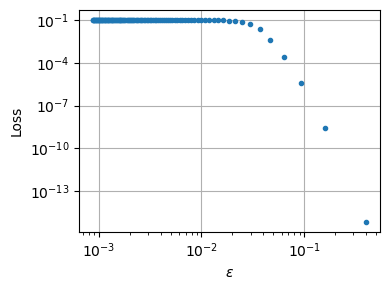

In [11]:
plt.figure(figsize=[4,3])
plt.grid()
plt.loglog(epsil_list,poly_list2,'.')
plt.xlabel('$\epsilon$')
plt.ylabel('Loss')
#plt.title(r'$\epsilon= \left(\dfrac{3}{n}\right)^{1.95}$')
plt.tight_layout()
savepath = os.path.join(Imagepath, 'Fixed_n.pdf')
plt.savefig(savepath)

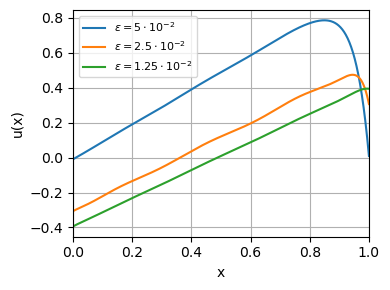

In [15]:
x=np.linspace(0,1,1000)

plt.figure(figsize=[4,3])
n=10
epsil = 0.05
sol=Legendre.Legendre_solution(n,epsil)
y = sol.y_coords()
plt.plot(x,y)

epsil = 0.025
sol=Legendre.Legendre_solution(n,epsil)
y = sol.y_coords()
plt.plot(x,y)

epsil = 0.0125
sol=Legendre.Legendre_solution(n,epsil)
y = sol.y_coords()
plt.plot(x,y)

plt.xlim([0,1])
plt.xlabel('x')
plt.ylabel('u(x)')
plt.tight_layout()
plt.legend(['$\epsilon=5\cdot 10^{-2}$','$\epsilon=2.5\cdot 10^{-2}$','$\epsilon=1.25\cdot 10^{-2}$'],fontsize=8)
plt.grid()

savepath = os.path.join(Imagepath, 'Fixed_n_evol.pdf')
plt.savefig(savepath)

Figures 4.3a and 4.3b

In [22]:
def check_poly(eps0, pow, n0):
    epsil_list = np.logspace(eps0,0,50)
    epsil2_list = []
    loss_list = []
    for epsil in epsil_list:
        n=(1/epsil)**(1/pow)*n0
        n = int(np.ceil(n))
        epsil2 = (n0/n)**pow
        loss=Legendre.Legendre_solution(n,epsil2).Loss
        epsil2_list.append(epsil2)
        loss_list.append(loss)
        print(n,epsil2, end='\r')
    return epsil2_list, loss_list

In [23]:
epsil_list0_75, loss_list0_75= check_poly(-2, 1/1.25, 1)
epsil_list1_00, loss_list1_00= check_poly(-2, 1.00, 1)
epsil_list1_25, loss_list1_25= check_poly(-2.5, 1/0.75, 1)
epsil_list1_50, loss_list1_50= check_poly(-3, 1/0.5, 1)

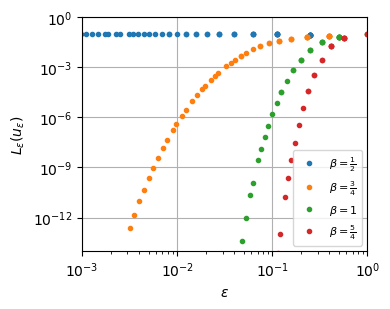

In [25]:
plt.figure(figsize=[4,3.2])
plt.grid()
plt.loglog(epsil_list1_50,loss_list1_50,'.',label='$\\beta=\\frac{1}{2}$')
plt.loglog(epsil_list1_25,loss_list1_25,'.',label='$\\beta=\\frac{3}{4}$')
plt.loglog(epsil_list1_00,loss_list1_00,'.',label='$\\beta=1$')
plt.loglog(epsil_list0_75,loss_list0_75,'.',label='$\\beta=\\frac{5}{4}$')

plt.xlabel('$\epsilon$')
plt.ylabel('$L_\epsilon(u_\epsilon)$')
plt.legend(fontsize=8)
plt.xlim([1e-3,1])
plt.ylim([1e-14,1])
plt.yticks([1,1e-3,1e-6,1e-9,1e-12])
savepath = os.path.join(Imagepath, 'difBeta.pdf')
plt.tight_layout()
plt.savefig(savepath)

In [26]:
epsil_list4, loss_list4= check_poly(-5, 1/0.51, 4)
epsil_list3, loss_list3= check_poly(-5, 1/0.51, 3)
epsil_list2, loss_list2= check_poly(-5, 1/0.51, 2)

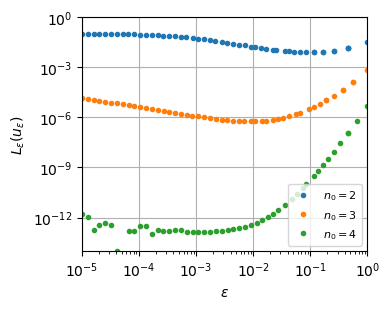

In [27]:
plt.figure(figsize=[4,3.2])
plt.grid()
plt.loglog(epsil_list2,loss_list2,'.',label='$n_0=2$')
plt.loglog(epsil_list3,loss_list3,'.',label='$n_0=3$')
plt.loglog(epsil_list4,loss_list4,'.',label='$n_0=4$')
plt.xlabel('$\epsilon$')
plt.ylabel('$L_\epsilon(u_\epsilon)$')
plt.legend(fontsize=8)
plt.xlim(1e-5,1)
plt.ylim([1e-14,1])
plt.yticks([1,1e-3,1e-6,1e-9,1e-12])
savepath = os.path.join(Imagepath, 'difN0.pdf')
plt.tight_layout()
plt.savefig(savepath)

## Chapter 5

Figure 5.1 is a tikz picture.

Figures 5.2a and 5.2b

In [ ]:
Imagepath = os.path.abspath('./Figures/Gamma_tanh')

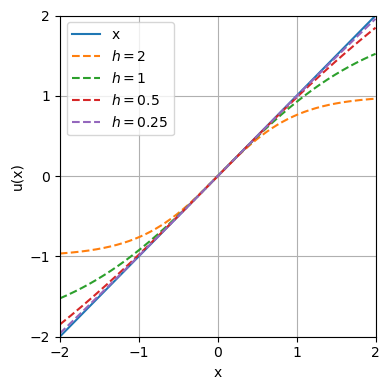

In [ ]:
x=np.linspace(-2,2,1001)
y = x

h=2
y1 = 2/h*np.tanh(h*x/2)

h=1
y2 = 2/h*np.tanh(h*x/2)

h=0.5
y3 = 2/h*np.tanh(h*x/2)

h=0.25
y4 = 2/h*np.tanh(h*x/2)

plt.figure(figsize=[4,4])
plt.grid()
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel('x')
plt.ylabel('u(x)')
plt.yticks([-2,-1,0,1,2])
plt.tight_layout()
plt.plot(x,y)
plt.plot(x,y1,'--')
plt.plot(x,y2,'--')
plt.plot(x,y3,'--')
plt.plot(x,y4,'--')
plt.legend(['x','$h=2$','$h=1$','$h=0.5$','$h=0.25$'],)
savepath = os.path.join(Imagepath, 'approx_x_tanh.pdf')
plt.savefig(savepath)

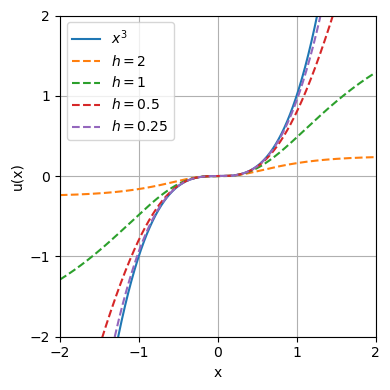

In [ ]:
x=np.linspace(-2,2,1001)
y = x**3

h=2
y1 = 1/h**3*(3*np.tanh(h*x/2)-np.tanh(3*h*x/2))

h=1
y2 = 1/h**3*(3*np.tanh(h*x/2)-np.tanh(3*h*x/2))

h=0.5
y3 = 1/h**3*(3*np.tanh(h*x/2)-np.tanh(3*h*x/2))

h=0.25
y4 = 1/h**3*(3*np.tanh(h*x/2)-np.tanh(3*h*x/2))

plt.figure(figsize=[4,4])
plt.grid()
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.yticks([-2,-1,0,1,2])
plt.xlabel('x')
plt.ylabel('u(x)')
plt.tight_layout()
plt.plot(x,y)
plt.plot(x,y1,'--')
plt.plot(x,y2,'--')
plt.plot(x,y3,'--')
plt.plot(x,y4,'--')
plt.legend(['$x^3$','$h=2$','$h=1$','$h=0.5$','$h=0.25$'])
savepath = os.path.join(Imagepath, 'approx_x3_tanh.pdf')
plt.savefig(savepath)

Figure 5.3

In [28]:
def x0grow(N):
    epsil_list = []
    loss_list = []
    for i in range(1,N):
        epsil = (i/N)**2
        x0 = np.log((1/epsil))
        a0, b0, w0 = 2*x0, 0 , 1/2/x0
        a3, b3, w3 = 2/(np.exp(1/epsil)-1), np.arctanh(1/2), 0
        a1, b1, w1 = -np.exp(x0)/(1-np.exp(-1/epsil)), np.arctanh(1/2), 0
        a2, b2, w2 = 1/2*np.exp(x0), 1/2*x0+1/(2*epsil)/(1-np.exp(-1/epsil)), -1/(2*epsil)

        w = torch.tensor([[w0],[w1],[w2],[w3]]).to(device)
        w = w.float()
        a = torch.tensor([[a0,a1,a2,a3]]).to(device)
        a = a.float()
        b = torch.tensor([b0,b1,b2,b3]).to(device)
        b = b.float()

        Result = Train_v2.train_network(LR=0, 
                                        HIDDEN=3, 
                                        NR_EPOCHS=1, 
                                        h_SAMPLE=0.0001, 
                                        LAMBDA=1/2,
                                        PLOT_INTERVAL=-1,
                                        EPSIL=epsil, 
                                        Initializer=Train_v2.initializeNetwork_guess, 
                                        optim='SGD',
                                        momentum=0.99,
                                        params=[w,a,b])
        epsil_list.append(epsil)
        loss_list.append(Result.loss.item())
    return epsil_list,loss_list

In [29]:
epsil_list, loss_list = x0grow(200)
print(epsil_list[9])
print(loss_list[9])

C:\Users\20183003\AppData\Local\Temp\ipykernel_15332\1059405896.py:8: RuntimeWarning: overflow encountered in exp
  a3, b3, w3 = 2/(np.exp(1/epsil)-1), np.arctanh(1/2), 0


0.0025000000000000005
0.00125571945682168


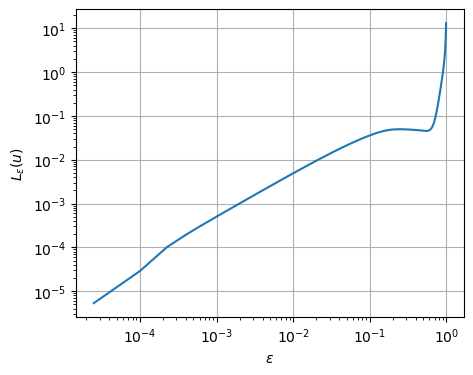

In [31]:
plt.figure(figsize=[5,4])
plt.grid()
plt.loglog(epsil_list,loss_list)
plt.xlabel('$\epsilon$')
plt.ylabel('$L_\epsilon(u)$')
savepath = os.path.join(Imagepath, 'lossrecsequence.pdf')
#plt.savefig(savepath)